from https://medium.com/@ageitgey/how-to-break-a-captcha-system-in-15-minutes-with-machine-learning-dbebb035a710


In [1]:
!wget https://s3-us-west-2.amazonaws.com/mlif-example-code/solving_captchas_code_examples.zip

--2021-02-12 01:17:10--  https://s3-us-west-2.amazonaws.com/mlif-example-code/solving_captchas_code_examples.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.234.16
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.234.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13863487 (13M) [application/zip]
Saving to: ‘solving_captchas_code_examples.zip.2’

solving_captchas_co 100%[===================>]  13.22M  --.-KB/s    in 0.1s    

2021-02-12 01:17:10 (91.1 MB/s) - ‘solving_captchas_code_examples.zip.2’ saved [13863487/13863487]



In [2]:
!unzip solving_captchas_code_examples.zip

Archive:  solving_captchas_code_examples.zip
replace solving_captchas_code_examples/extract_single_letters_from_captchas.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
image_path = "/content/solving_captchas_code_examples/generated_captcha_images"

In [4]:
pip install fastai --upgrade -q

In [5]:
from fastai.vision.all import *

In [6]:
path = Path(image_path)

In [7]:
im = Image.open(path/'27XY.png')
im.to_thumb(256,256)

In [9]:
%cd /content/solving_captchas_code_examples

/content/solving_captchas_code_examples


Lets create a function for extracting single letters from captchas

In [ ]:
import os
import os.path
import cv2
import glob
import imutils

def extract_single_letters():
  pass # lets implement this later

In [12]:
!python3 extract_single_letters_from_captchas.py

Streaming output truncated to the last 5000 lines.
[INFO] processing image 4956/9955
[INFO] processing image 4957/9955
[INFO] processing image 4958/9955
[INFO] processing image 4959/9955
[INFO] processing image 4960/9955
[INFO] processing image 4961/9955
[INFO] processing image 4962/9955
[INFO] processing image 4963/9955
[INFO] processing image 4964/9955
[INFO] processing image 4965/9955
[INFO] processing image 4966/9955
[INFO] processing image 4967/9955
[INFO] processing image 4968/9955
[INFO] processing image 4969/9955
[INFO] processing image 4970/9955
[INFO] processing image 4971/9955
[INFO] processing image 4972/9955
[INFO] processing image 4973/9955
[INFO] processing image 4974/9955
[INFO] processing image 4975/9955
[INFO] processing image 4976/9955
[INFO] processing image 4977/9955
[INFO] processing image 4978/9955
[INFO] processing image 4979/9955
[INFO] processing image 4980/9955
[INFO] processing image 4981/9955
[INFO] processing image 4982/9955
[INFO] processing image 4983/99

In [13]:
TRAIN = Path("/content/solving_captchas_code_examples/extracted_letter_images")

In [18]:
digits = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(64)
)

In [19]:
dls = digits.dataloaders(TRAIN)

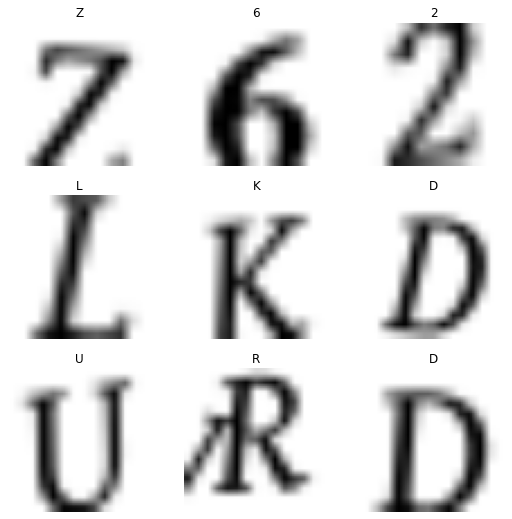

In [20]:
dls.show_batch()

In [21]:
learn = cnn_learner(dls, resnet18)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,time
0,0.183875,0.055826,00:50


epoch,train_loss,valid_loss,time
0,0.033911,0.006283,00:53
1,0.015768,0.005316,00:53
2,0.004769,0.001748,00:52
3,0.001302,0.001144,00:53


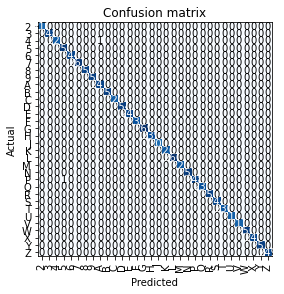

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

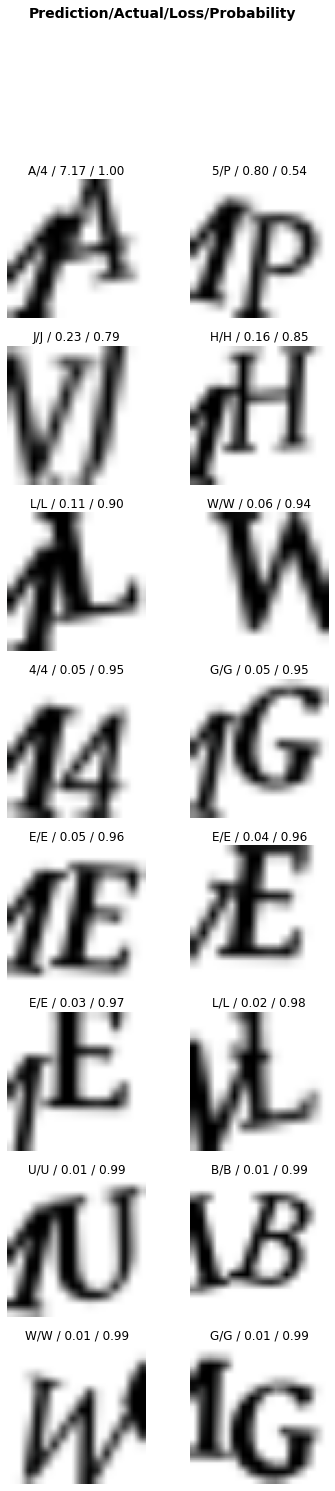

In [23]:
interp.plot_top_losses(16, nrows=8)

In [24]:
interp.vocab

['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [26]:
learn.export()

# need to export into hd

In [30]:
from fastai.vision.widgets import *

In [31]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [34]:
img = PILImage.create(btn_upload.data[-1])

In [35]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [36]:
pred, pred_idx, probs = learn.predict(img)